In [1]:
from matplotlib import rcParams
import pandas as pd

rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False

import NaiveDE
import SpatialDE

In [2]:
counts = pd.read_csv('E://SpatialDE/Analysis/MouseOB/data/Rep11_MOB_0.csv', index_col=0)
# counts = pd.read_csv('E://SPFinder/test/data/test2/simulate_exp.csv', sep=',', index_col=0)
counts = counts.T[counts.sum(0) >= 3].T  # Filter practically unobserved genes

print(counts.shape)
counts.iloc[:6,:6]

(262, 14859)


,Nrf1,Zbtb5,Ccnl1,Lrrfip1,Bbs1,Lix1
16.92x9.015,1,1,1,2,1,2
16.945x11.075,0,0,3,2,2,7
16.97x10.118,0,1,1,0,0,0
16.939x12.132,1,0,1,0,4,6
16.949x13.055,0,0,0,3,0,2
16.942x15.088,0,0,0,5,0,1


In [3]:
counts_t = pd.read_csv('E://SPFinder/test/data/test2/simulate_exp.csv', sep=',', index_col=0)
sample_info_t = pd.read_csv('E://SPFinder/test/data/test2/simulate_position.csv', sep=',', index_col=0)

In [4]:
sample_info = pd.read_csv('E://SpatialDE/Analysis/MouseOB/MOB_sample_info.csv', index_col=0)
# sample_info = pd.read_csv('E://SPFinder/test/data/test2/simulate_position.csv', sep=',', index_col=0)
counts = counts.loc[sample_info.index]  # Align count matrix with metadata table

sample_info['total_counts'] = counts.sum(axis=1)

sample_info.head(5)

,x,y,total_counts
16.92x9.015,16.920,9.015,18790
16.945x11.075,16.945,11.075,36990
16.97x10.118,16.970,10.118,12471
16.939x12.132,16.939,12.132,22703
16.949x13.055,16.949,13.055,18641


(6.88005, 29.05495, 8.26345, 24.79755)

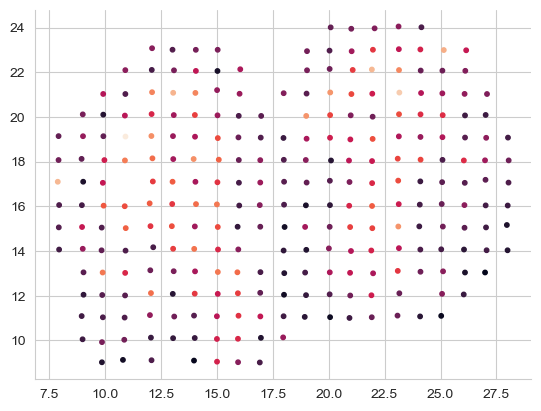

In [5]:
import matplotlib.pyplot as plt

plt.scatter(sample_info['x'], sample_info['y'], c=sample_info['total_counts'], s=10)
plt.axis('equal')

In [6]:
norm_expr = NaiveDE.stabilize(counts.T).T
#resid_expr = NaiveDE.regress_out(sample_info, norm_expr.T, 'np.log(total_counts)').T

In [8]:
norm_expr[:5]

,Nrf1,Zbtb5,Ccnl1,Lrrfip1,Bbs1,Lix1,Whrn,Ate1,Ubac1,Rab34,...,Mertk,Snord19,1500002O10Rik,Gm5105,H2-Bl,Mir384,Snord91a,Zdhhc23,Fam150a,Hist4h4
16.92x9.015,1.227749,1.227749,1.227749,1.484676,1.227749,1.484676,1.227749,1.227749,1.484676,1.227749,...,0.881093,0.881093,0.881093,0.881093,0.881093,0.881093,0.881093,0.881093,0.881093,0.881093
16.945x11.075,0.881093,0.881093,1.688903,1.484676,1.484676,2.242149,0.881093,1.484676,1.688903,1.484676,...,0.881093,0.881093,0.881093,0.881093,0.881093,0.881093,0.881093,0.881093,0.881093,0.881093
16.97x10.118,0.881093,1.227749,1.227749,0.881093,0.881093,0.881093,1.227749,0.881093,0.881093,0.881093,...,0.881093,0.881093,0.881093,0.881093,0.881093,0.881093,0.881093,0.881093,0.881093,0.881093
16.939x12.132,1.227749,0.881093,1.227749,0.881093,1.858411,2.129842,1.227749,1.858411,1.688903,1.227749,...,0.881093,0.881093,0.881093,0.881093,0.881093,0.881093,0.881093,0.881093,0.881093,0.881093
16.949x13.055,0.881093,0.881093,0.881093,1.688903,0.881093,1.484676,0.881093,1.484676,1.858411,0.881093,...,0.881093,0.881093,0.881093,0.881093,0.881093,0.881093,0.881093,0.881093,0.881093,0.881093


In [ ]:
sample_resid_expr = norm_expr.sample(n=300, axis=1, random_state=1)

X = sample_info[['x', 'y']]
results = SpatialDE.run(X, sample_resid_expr)

In [10]:
results.head().T

,0,1,2,3,4
FSV,0.0,0.0,0.0,0.999955,0.0
M,4,4,4,4,4
g,Cpsf3l,Nlrp10,Slc43a1,Angel2,Mars2
l,0.402001,0.402001,0.402001,0.402001,0.402001
max_delta,485165195.40979,485165195.40979,485165195.40979,0.000045,485165195.40979
max_ll,-52.137069,151.837905,488.103788,-125.022951,191.495932
max_mu_hat,1.134398,0.9327,0.885093,1.351076,0.910616
max_s2_t_hat,0.0,0.0,0.0,1.699941,0.0
model,SE,SE,SE,SE,SE
n,260,260,260,260,260


In [11]:
results.sort_values('qval').head(10)[['g', 'l', 'qval']]

,g,l,qval
179,Hpcal4,1.907609,1.332268e-13
243,Ube2e3,1.907609,3.886832e-07
270,Hsp90ab1,3.205604,2.924665e-06
134,Anks1b,1.135190,2.924665e-06
254,Cacna2d1,3.205604,4.098671e-06
229,Gng13,1.907609,4.235720e-06
230,2310036O22Rik,1.907609,1.638022e-05
163,Srsf7,1.907609,2.780662e-05
197,Vstm2a,1.907609,8.815505e-05
245,Skp1a,1.907609,1.820638e-04


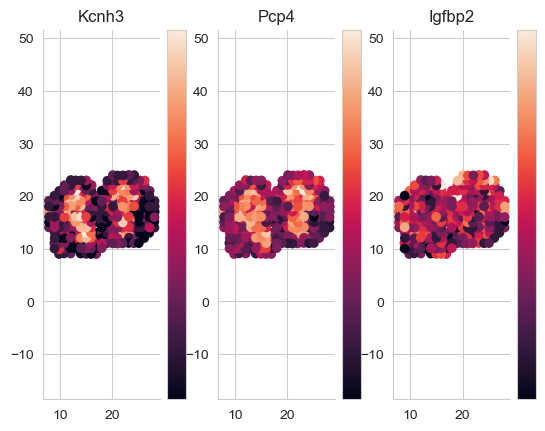

In [12]:
for i, g in enumerate(['Kcnh3', 'Pcp4', 'Igfbp2']):
    plt.subplot(1, 3, i + 1)
    plt.scatter(sample_info['x'], sample_info['y'], c=norm_expr[g])
    plt.title(g)
    plt.axis('equal')
    plt.colorbar(ticks=[])

In [13]:
results.sort_values('qval').tail(10)[['g', 'l', 'qval']]

,g,l,qval
63,Hspb6,0.402001,0.975231
61,Tdrd5,0.402001,0.975231
182,Dbt,1.907609,0.975231
60,Traf3,0.402001,0.975231
184,Ccdc136,1.907609,0.975231
59,Cradd,0.402001,0.975231
58,Tshr,0.402001,0.975231
56,Lpo,0.402001,0.975231
62,Kcnj6,0.402001,0.975231
0,Cpsf3l,0.402001,0.975231


C:\Users\pssun\AppData\Local\Temp\ipykernel_6752\950194832.py:3: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.axhline(0.05, c='black', lw=1, ls='--')


Text(0, 0.5, 'Adj. P-value')

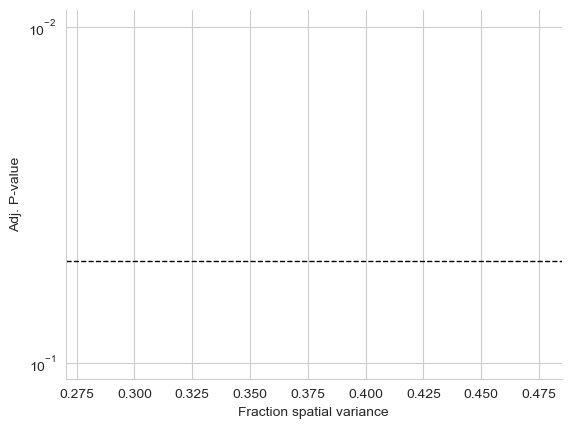

In [50]:
plt.yscale('log')
plt.scatter(results['FSV'], results['qval'], c='black')
plt.axhline(0.05, c='black', lw=1, ls='--')
plt.gca().invert_yaxis()
plt.xlabel('Fraction spatial variance')
plt.ylabel('Adj. P-value')

In [23]:
sign_results = results.query('qval < 0.05')
sign_results['l'].value_counts()
histology_results, patterns = SpatialDE.aeh.spatial_patterns(X, norm_expr, sign_results, C=3, l=1.8, verbosity=1)

F:\conda\envs\spatial\lib\site-packages\SpatialDE\base.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  R2 = -2. * np.dot(X, X.T) + (Xsq[:, None] + Xsq[None, :])


iter 0, ELBO: -7.39e+08
iter 1, ELBO: -4.20e+08, delta_ELBO: 3.19e+08
iter 2, ELBO: -4.20e+08, delta_ELBO: 2.31e+03
iter 3, ELBO: -4.20e+08, delta_ELBO: 5.09e+02
iter 4, ELBO: -4.20e+08, delta_ELBO: 3.84e+01
iter 5, ELBO: -4.20e+08, delta_ELBO: 1.04e+00
iter 6, ELBO: -4.20e+08, delta_ELBO: 2.82e-02
iter 7, ELBO: -4.20e+08, delta_ELBO: 7.67e-04
Converged on iter 7


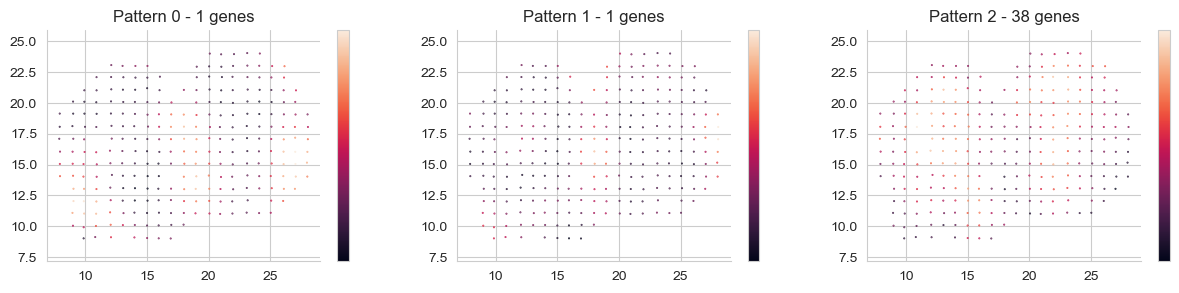

In [15]:
plt.figure(figsize=(15, 3))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(sample_info['x'], sample_info['y'], c=patterns[i], s=0.2)
    plt.axis('equal')
    plt.title('Pattern {} - {} genes'.format(i, histology_results.query('pattern == @i').shape[0] ))
    plt.colorbar(ticks=[])

In [24]:
for i in histology_results.sort_values('pattern').pattern.unique():
    print('Pattern {}'.format(i))
    print(', '.join(histology_results.query('pattern == @i').sort_values('membership')['g'].tolist()))
    print()

Pattern 0
Dcn

Pattern 1
Gng13

Pattern 2
Neo1, Kctd17, Polr2m, 2310036O22Rik, Ppdpf, Luc7l2, Ube2e3, Skp1a, Kat7, Cacna2d1, Prrc2b, Cct7, Trim44, Hsp90ab1, Gramd1a, Cttn, Tln2, Ap4s1, Ythdf2, N6amt2, Zswim8, Anks1b, Stmn4, Cdc123, Tmem65, Srsf7, Eif2s1, Slc6a17, Abhd12, Hpcal4, Hira, Sept7, Arpc3, Slc38a3, Ip6k1, Vstm2a, Fam84a, Rnf14


In [18]:
histology_results

,g,pattern,membership
132,Neo1,2,1.0
133,Zswim8,2,1.0
134,Anks1b,2,1.0
135,Stmn4,2,1.0
141,Dcn,1,1.0
147,Cdc123,2,1.0
154,Tmem65,2,1.0
163,Srsf7,2,1.0
168,Eif2s1,2,1.0
171,Abhd12,2,1.0


In [33]:
import numpy as np

test_array = np.random.random((5, 5))

def test_func(x):
    return x - 1

results = np.apply_along_axis(test_func, axis=1, arr=test_array)
results

array([[-0.18981823, -0.74157409, -0.6917874 , -0.86209914, -0.35001019],
       [-0.50781114, -0.71084928, -0.19997625, -0.0238783 , -0.54935702],
       [-0.54940734, -0.84993029, -0.77052937, -0.45358736, -0.43685953],
       [-0.85229234, -0.04708308, -0.0280866 , -0.86844828, -0.00900396],
       [-0.1549927 , -0.91975957, -0.794489  , -0.14314092, -0.800792  ]])